In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-basketball-association-nba/nba-players.csv


# Import necessary libraries

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df=pd.read_csv("/kaggle/input/national-basketball-association-nba/nba-players.csv")

# Basic Data Exploration

In [4]:
df.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [5]:
df.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [6]:
df.describe()   # Statistics

,Unnamed: 0,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,...,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,386.968991,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,...,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,0.000000,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,334.750000,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,...,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,669.500000,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,...,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,1004.250000,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,...,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,1339.000000,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,...,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [7]:
df.shape # Dataset Shape

(1340, 22)

In [8]:
df.isnull().sum()   # Missing Values

Unnamed: 0     0
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

# Machine Learning Model

**Data Splitting**

In [9]:
# Define features and the target variable

X =df.drop(['name', 'target_5yrs'], axis=1)
y = df['target_5yrs']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
X_train.shape

(1072, 20)

In [13]:
X_test.shape

(268, 20)

**Model Selection**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


**Model Training**

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier()

**Model Evaluation**

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test) 


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7276119402985075


In [19]:

from sklearn.metrics import classification_report 

In [20]:
# Generate a classification report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.51      0.58        99
           1       0.75      0.86      0.80       169

    accuracy                           0.73       268
   macro avg       0.71      0.68      0.69       268
weighted avg       0.72      0.73      0.72       268



**Confusion matrix**

In [21]:
from sklearn.metrics import confusion_matrix 

In [22]:
# Generate a confusion matrix

cm = confusion_matrix(y_test, y_pred)


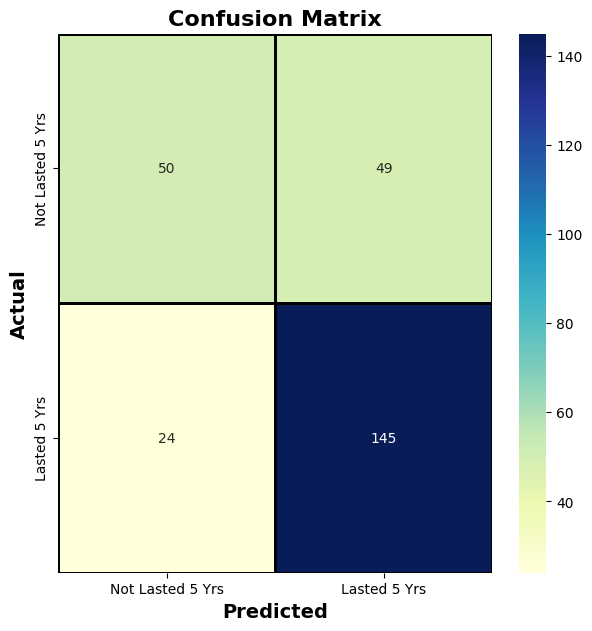

In [23]:
# Visualize the confusion matrix

plt.figure(figsize=(7, 7))


sns.heatmap(
   cm, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=1, linecolor='black',
    xticklabels=["Not Lasted 5 Yrs", "Lasted 5 Yrs"],
    yticklabels=["Not Lasted 5 Yrs", "Lasted 5 Yrs"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')


# Show the plot
plt.show()